In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#Reading dataset from the CSV file
with open("//content/kc_house_data.csv", 'r') as file:
    df = pd.read_csv(file)


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#summary statistics for the numerical columns in the dataset
df.describe()

In [ ]:
#exploring dataset
df.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Encoding columns using LabelEncoder
label_encoder = LabelEncoder()
df["date"] = label_encoder.fit_transform(df["date"])

In [ ]:
#Checking for missing values in the DataFrame
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#most correlated with "price"
df.corrwith(df["price"],method="pearson")

id              -0.016762
date            -0.004649
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
dtype: float64

The most important feartures in this dataset are the most correlated with price

sqft_living      0.702035

grade            0.667434

sqft_above       0.605567

sqft_living15    0.585379

In [ ]:
# Create the scatter plot
fig = px.scatter(df, x='price', y='sqft_living')

# Show the chart
fig.show()


By observing the graph we can see that there’s a positive correlation between Price and sqft_living

In [ ]:
#create the histogram
fig = px.histogram(df, x='price', nbins=20)
#show the plot
fig.show()

In [ ]:
#extract x and y from our data
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) #splitting data with test size of 35%
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 76484977061.77612
R squared 0.49406905389089006


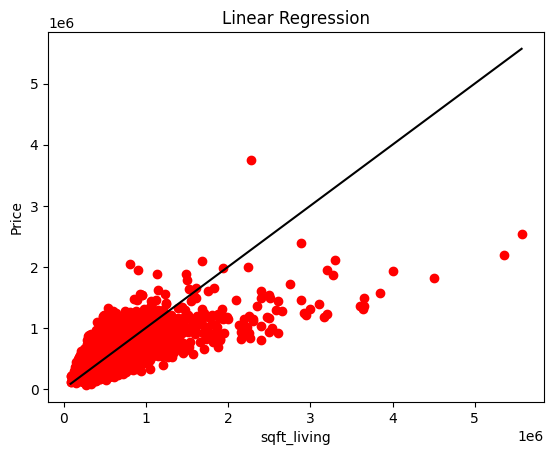

In [ ]:
plt.scatter(y_test,predicted,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="k")
plt.show()

In [ ]:
#ARRANGE DATA INTO FEATURES AND TARGET

X = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
y= df["price"]

In [ ]:
#SPLIT DATA INTO TRAINING AND TESTING SETS
X_train, X1_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = .80)

In [ ]:
#build linear regression model
model=LinearRegression()
#fitting the training data
model.fit(X_train,y_train)
#testing our model’s performance
predicted1=model.predict(X1_test)
print("MSE =", mean_squared_error(y_test,predicted1))
print("R squared =", metrics.r2_score(y_test,predicted1))

MSE = 68865225844.17303
R squared = 0.5444719969358266


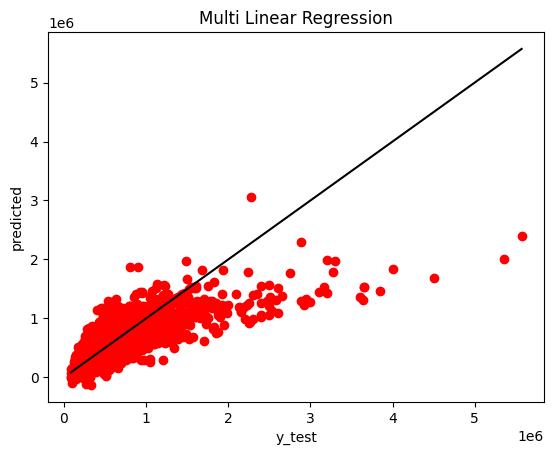

In [ ]:
plt.scatter(y_test,predicted1,color="r")
plt.title("Multi Linear Regression")
plt.ylabel("predicted")
plt.xlabel("y_test")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="k")
plt.show()

 R squared multi-linear = 0.5444719969358266 > R squared simple-linear = 0.49406905389089006

 A higher R-squared indicates that the multi-linear model is a better fit for the data than the simple linear model. The additional independent variables capture more of the underlying relationships and nuances in the data.
 The multi-linear model is likely to make more accurate predictions for new, unseen data compared to the simple linear model.